<a href="https://colab.research.google.com/github/adi907/ImageDeblurring/blob/main/Non_blindDeblurring.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# NON BLIND IMAGE DEBLURRING #

Load a clear image. Add Blur to it. Then simply unblur it as blur filter is already known to us. 

In [ ]:
from google.colab import drive

drive.mount('/content/drive')

In [ ]:
!unzip /content/drive/MyDrive/archive.zip

Archive:  /content/drive/MyDrive/archive.zip
  inflating: Celebrity Faces Dataset/Angelina Jolie/001_fe3347c0.jpg  
  inflating: Celebrity Faces Dataset/Angelina Jolie/002_8f8da10e.jpg  
  inflating: Celebrity Faces Dataset/Angelina Jolie/003_57612506.jpg  
  inflating: Celebrity Faces Dataset/Angelina Jolie/004_f61e7d0c.jpg  
  inflating: Celebrity Faces Dataset/Angelina Jolie/005_582c121a.jpg  
  inflating: Celebrity Faces Dataset/Angelina Jolie/006_9135205d.jpg  
  inflating: Celebrity Faces Dataset/Angelina Jolie/007_cabbfcbb.jpg  
  inflating: Celebrity Faces Dataset/Angelina Jolie/008_d1f87068.jpg  
  inflating: Celebrity Faces Dataset/Angelina Jolie/009_fb3e6174.jpg  
  inflating: Celebrity Faces Dataset/Angelina Jolie/010_f99d79e3.jpg  
  inflating: Celebrity Faces Dataset/Angelina Jolie/011_7344ca35.jpg  
  inflating: Celebrity Faces Dataset/Angelina Jolie/012_cfcd4007.jpg  
  inflating: Celebrity Faces Dataset/Angelina Jolie/013_95ecbd39.jpg  
  inflating: Celebrity Faces Dat

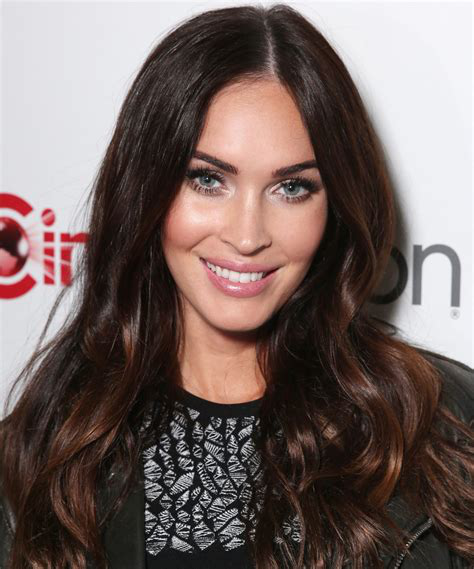

In [ ]:
# Load the image
from PIL import Image
import requests
from io import BytesIO

image='/content/i3.jpg'
image='/content/Celebrity Faces Dataset/Megan Fox/005_9574c208.jpg'


imgInit=Image.open(image)
imgInit.show()

In [ ]:
# Image dimensions
import cv2

img = cv2.imread(image, cv2.IMREAD_UNCHANGED)
print('Original Dimensions : ',img.shape)

Original Dimensions :  (569, 474, 3)


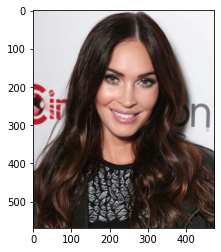

In [ ]:
# Load image on a plot
import matplotlib.pyplot as plt

plt.imshow(imgInit,cmap='gray')

We convert the RGB color image to **Grayscale** to eliminate an extra channel. And also resize the image to match the dimensions of our blur filter

In [ ]:
# Resize image
newsize=(500,500)
resized = cv2.resize(img, newsize, interpolation = cv2.INTER_AREA)

print('Resized Dimensions : ',resized.shape)

Resized Dimensions :  (500, 500, 3)


In [ ]:
# Save image
import os

pathOP='/content/'
output_file_path = os.path.join(pathOP, 'finalImage.png')
cv2.imwrite(output_file_path, resized)

True

In [ ]:
# Convert image to grayscale
img_new = cv2.imread('/content/finalImage.png',0)
print('Grayscale Dimensions: ',img_new.shape)

Grayscale Dimensions:  (500, 500)


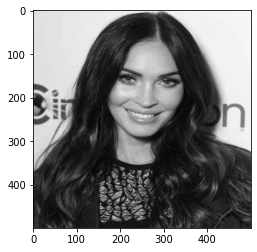

In [ ]:
# Display image
plt.imshow(img_new,cmap='gray')

In [ ]:
# Define function to blur the image (use fast fourier transform {see notes.pdf})

from scipy.fft import fft2
from scipy.fft import ifft2
from scipy.fft import fftshift
import numpy as np

def blur_filter(n,width=5):
    """
        n: dimensions of each side of the image
        width: Width of the out of focus filter
    
    Returns:
        G: Fourier transform of filter
    """

    x,y = np.mgrid[:n,:n]
    g = (x-n/2)**2 + (y-n/2)**2 < width**2
    g = g/np.sum(g)
    return fft2(fftshift(g)).real

def blur(f,G):
    """
        f: image to blur
        G: Filter 

    Returns:
        Blurred image
    """
    return ifft2(G*fft2(f)).real



Use the previous function to blur the image

Text(0.5, 1.0, 'Out of focus blur with noise')

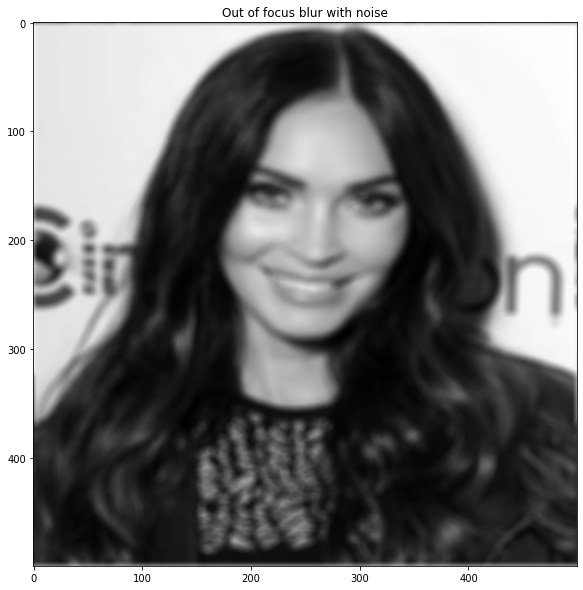

In [ ]:
# Get the blur filter
G = blur_filter(img_new.shape[0],width=5)

# Blur the image
img_blurred=blur(img_new,G)

#Add noise
sigma = 0.02 #Try sigma=0 first, and then try sigma > 0 to add noise
img_blurred = img_blurred + (sigma*np.random.randn(img_new.shape[0],img_new.shape[1]))

#Show blurred and noisy image
plt.figure(figsize=(10,10))
plt.imshow(img_blurred,cmap='gray')
plt.title('Out of focus blur with noise')


Now Deblur the image. Can do this directly as you already know the Blur filter

Text(0.5, 1.0, 'Direct deblurring')

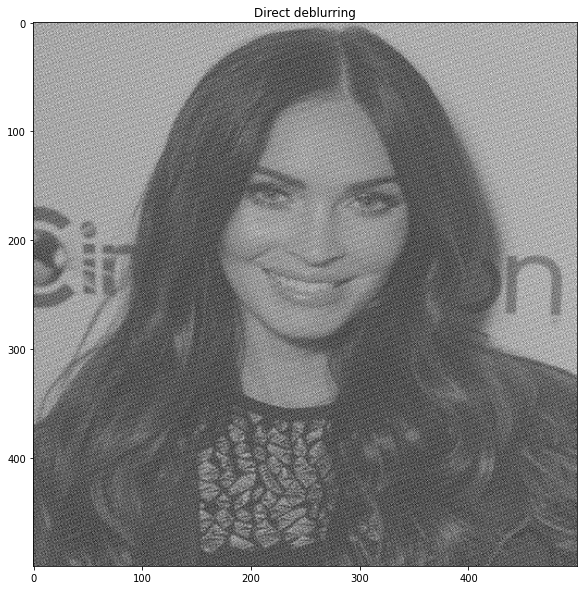

In [ ]:
# Deblur by using blur filter

img_deblurred = ifft2(fft2(img_blurred)/G).real
plt.figure(figsize=(10,10))
plt.imshow(img_deblurred,cmap='gray')
plt.title('Direct deblurring')